# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('/home/eduardo/mini-project-IV/data/data.csv') 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [90]:
# Which columns have missing values, and how many are there?
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
# What is the shape of the dataframe? 
df.shape

(614, 13)

Look at some basic statistics for numerical variables.

In [92]:
# Check which columns have numeric data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [93]:
# Generate basic statistics for numerical variables only
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [94]:
# How many applicants have a credit_history? 
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

We can also see from the mean and median that most applicants have a credit history (this could also be checked by looking at the mode).

In [95]:
# ApplicantIncome, CoapplicantIncome and skewness

It is interesting to notice that the mean and median for ApplicantIncome are so distinct (mean is larger than the median). We can also notice that the standard deviation (std) is larger than the actual mean. Considering that the income can't be negative, the large std shows that there is great variance in applicant income. It appears there are many candidates that earn less than the mean, and the data is skewed. 

We can also notice the same for coapplicant income, although to a less extent. In this case, there is probably a significant number of coapplicants with 0 income. As a consequence, the data is also skewed.

In both cases, I would say this follows my expectations, since income across applicants from different backgrounds does not necessarily follow a normal distribution. 

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [139]:
cat_feats = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [140]:
df[cat_feats].nunique()

Gender           2
Married          2
Dependents       4
Education        2
Self_Employed    2
Property_Area    3
Loan_Status      2
dtype: int64

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [98]:
# for loop to print the frequency of each entry in the 
# categorical features
for cat in cat_feats:
    print(df[cat].value_counts(), '\n')

Male      489
Female    112
Name: Gender, dtype: int64 

Yes    398
No     213
Name: Married, dtype: int64 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64 

Graduate        480
Not Graduate    134
Name: Education, dtype: int64 

No     500
Yes     82
Name: Self_Employed, dtype: int64 

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64 

Y    422
N    192
Name: Loan_Status, dtype: int64 



### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [54]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats

# set plotting to retina mode
set_matplotlib_formats('retina')

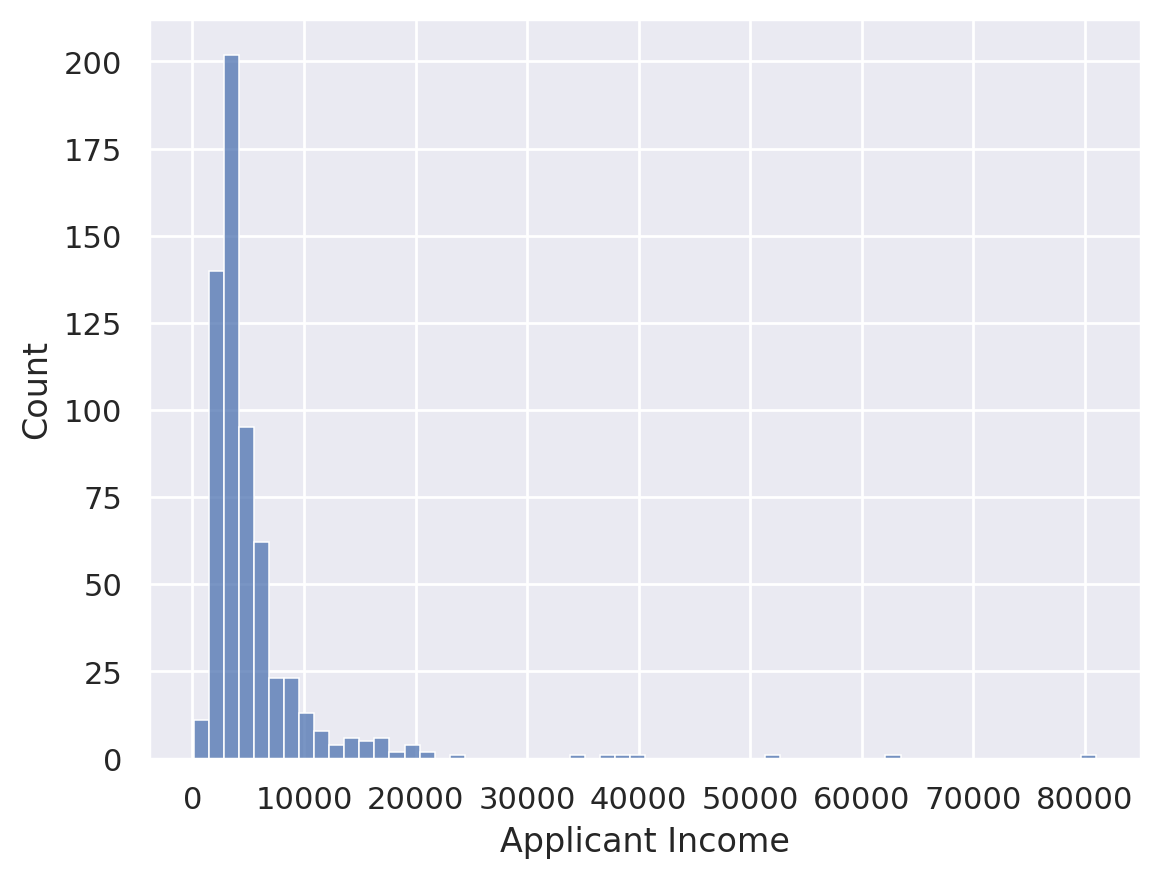

In [55]:
# set a grey background for the plot
sns.set(style='darkgrid')

# create histogram and show it
sns.histplot(data=df, x='ApplicantIncome', bins=60)

# Set the axis name
plt.xlabel('Applicant Income')
plt.show()


Look at box plots to understand the distributions. 

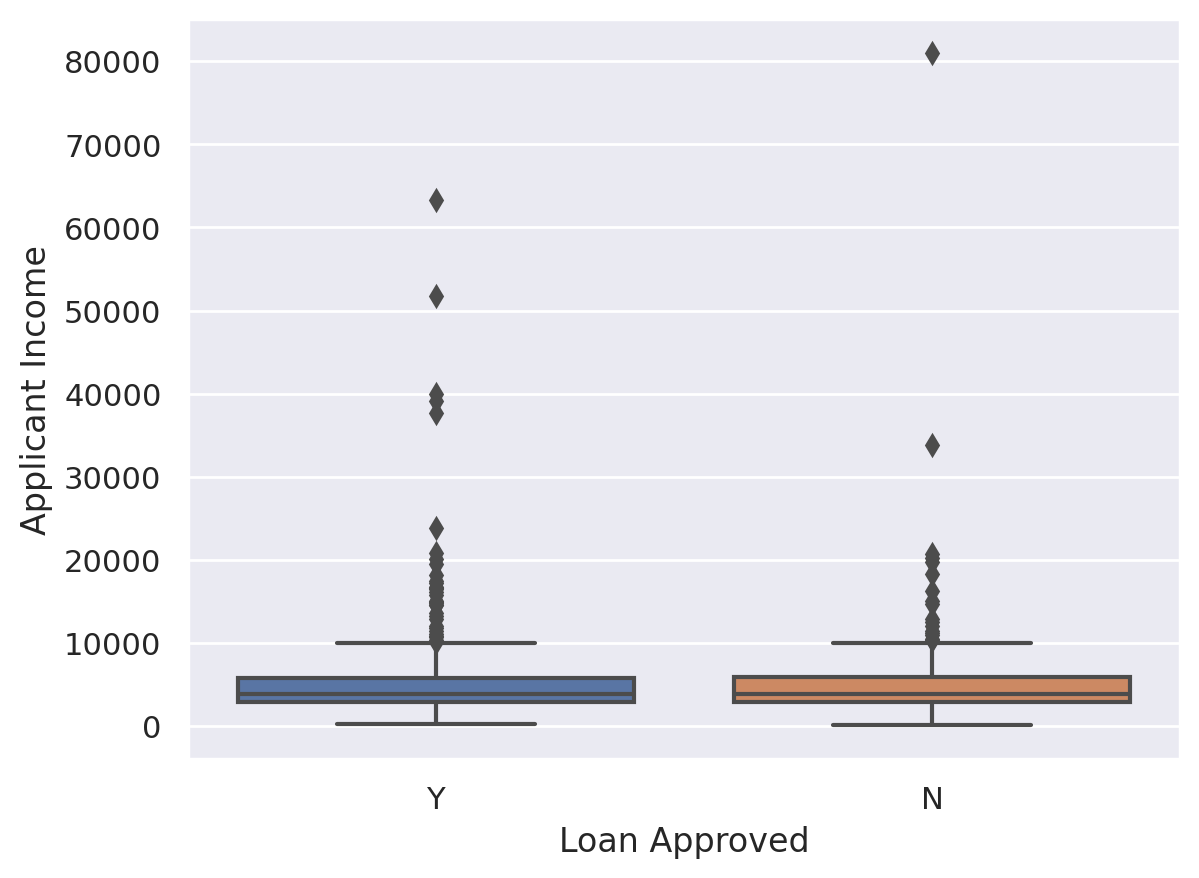

In [424]:
# Create the boxplot 
sns.boxplot(data=df['ApplicantIncome'], x=df['Loan_Status'], y=df['ApplicantIncome'])

# Edit the figure
plt.ylabel('Applicant Income')
plt.xlabel('Loan Approved')
plt.show()

In [125]:
# It is difficult to visualize the data, so let's use a filter
filtered_df = df[df['ApplicantIncome'] < 10000]
filtered_df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


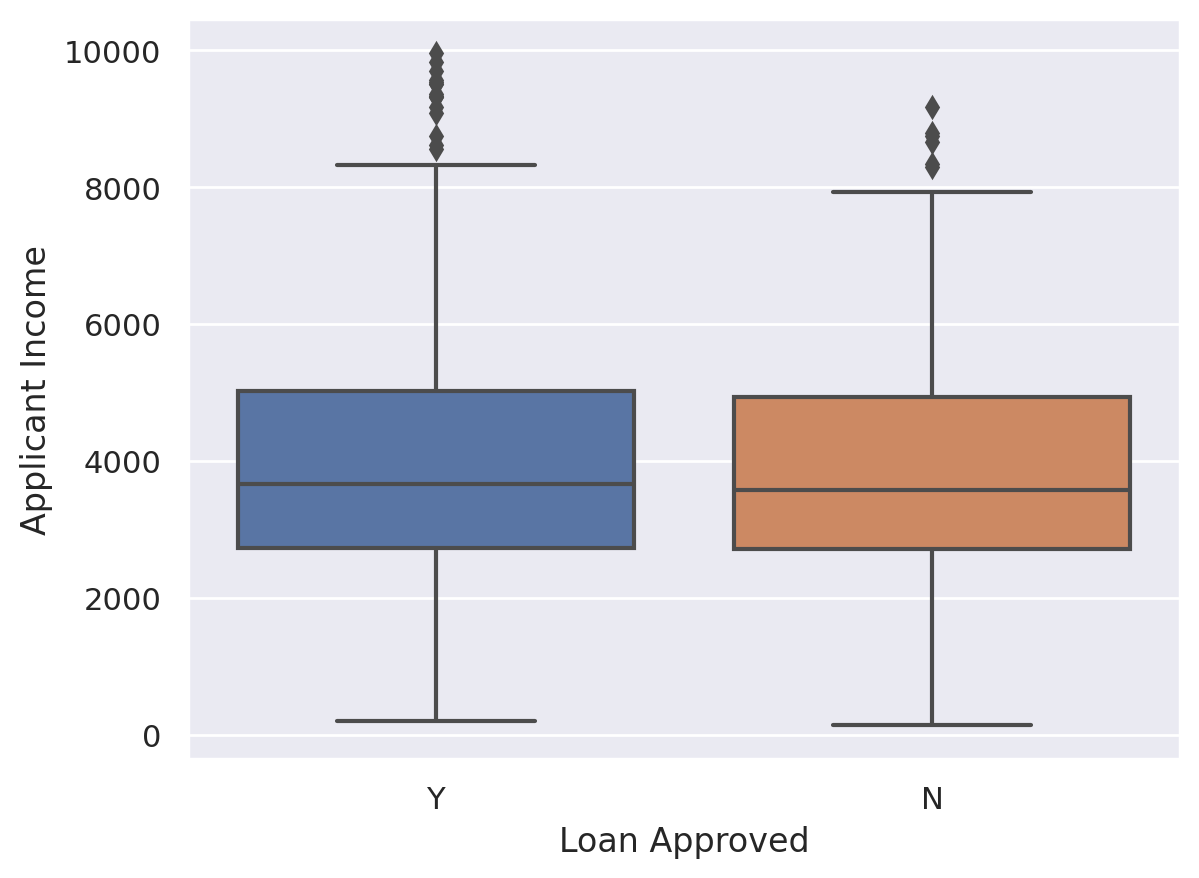

In [126]:
# plot the data with the filtered df
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=filtered_df)

# Edit the figure
plt.ylabel('Applicant Income')
plt.xlabel('Loan Approved')
plt.show()

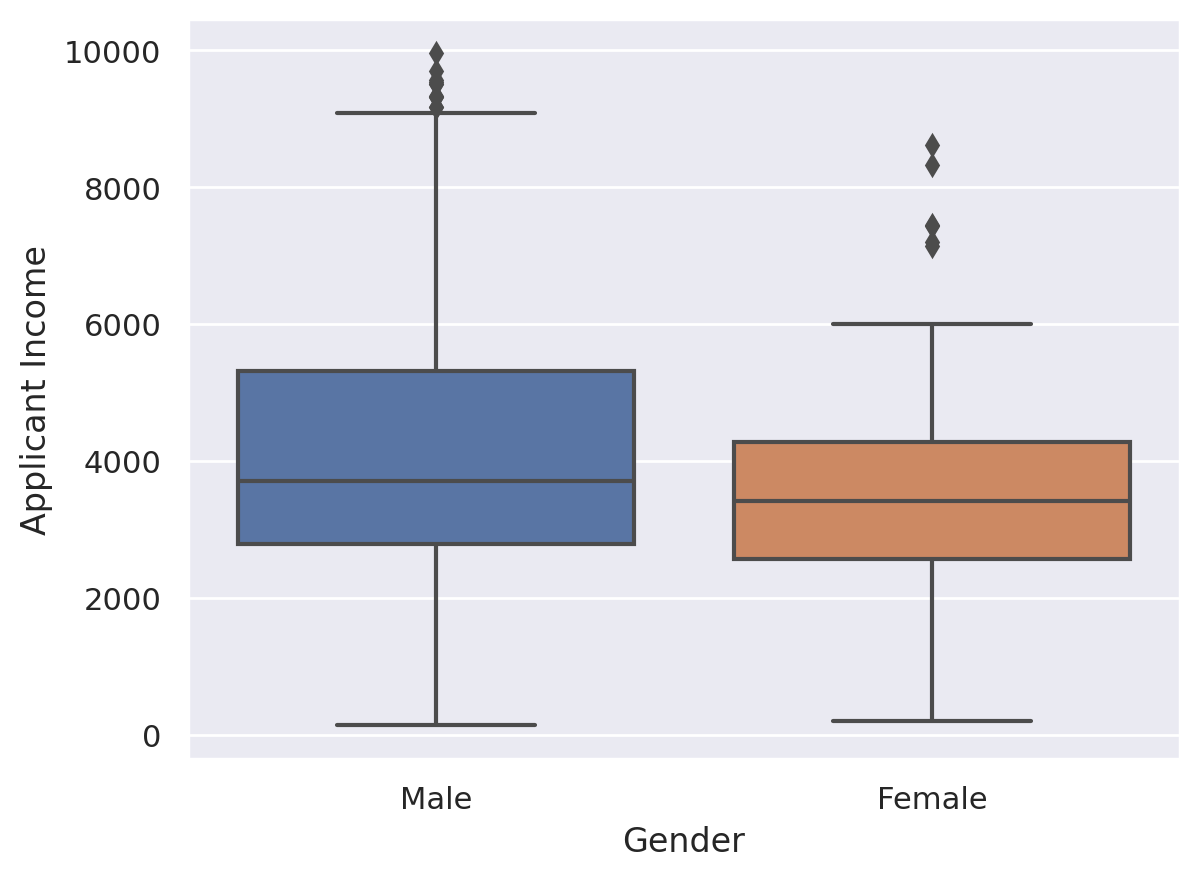

In [127]:
# Look at different features for the boxplot
sns.boxplot(data=filtered_df, x='Gender', y='ApplicantIncome')

# Edit the figure
plt.ylabel('Applicant Income')
plt.xlabel('Gender')
plt.show()

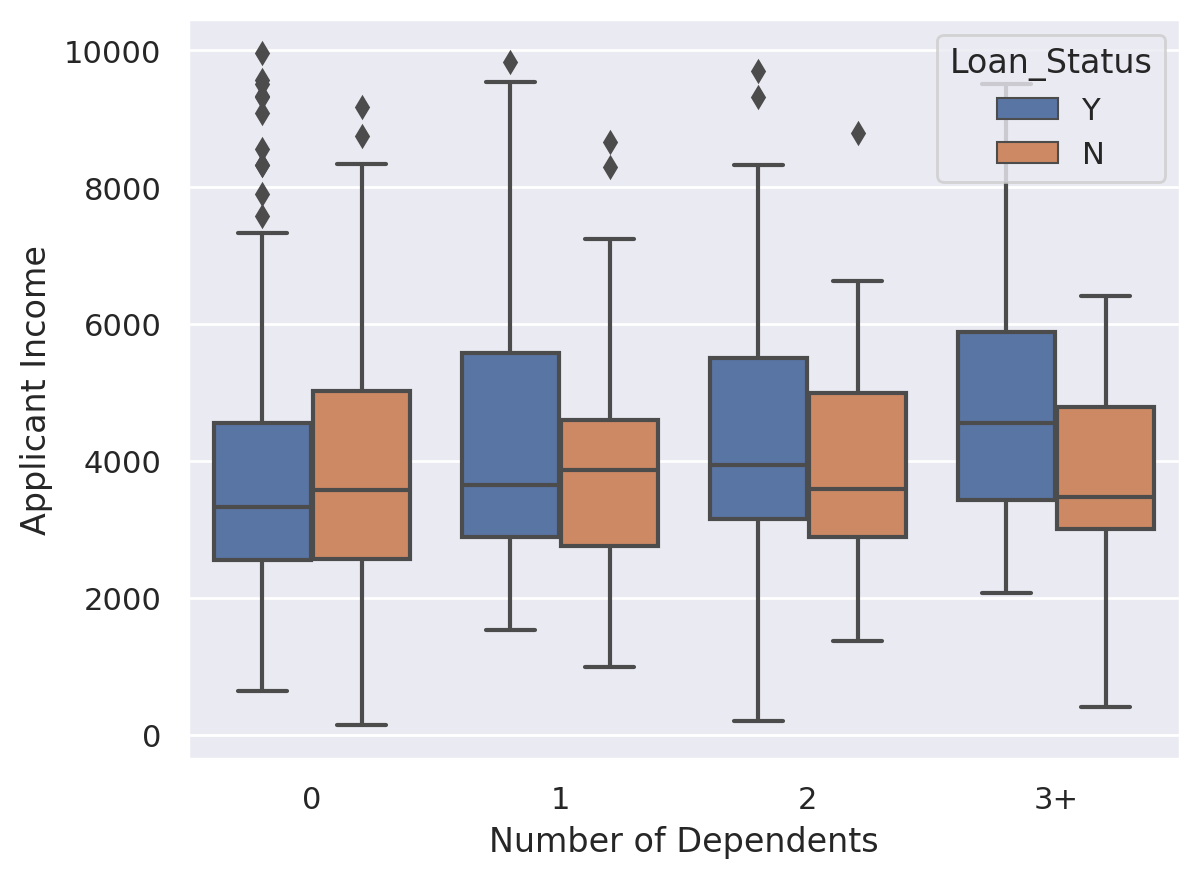

In [128]:
# Let's look at a violin plot 
sns.boxplot(x='Dependents', y='ApplicantIncome', hue='Loan_Status', data=filtered_df)

# Edit the figure
plt.ylabel('Applicant Income')
plt.xlabel('Number of Dependents')
plt.show()

Look at the distribution of income segregated  by `Education`

In [132]:
# Let's first set a different filter
grad_filter = df[(df['ApplicantIncome'] < 15000) & (df['Education'] == 'Graduate')]
ngrad_filter = df[(df['ApplicantIncome'] < 15000) & (df['Education'] == 'Non-Graduate')]

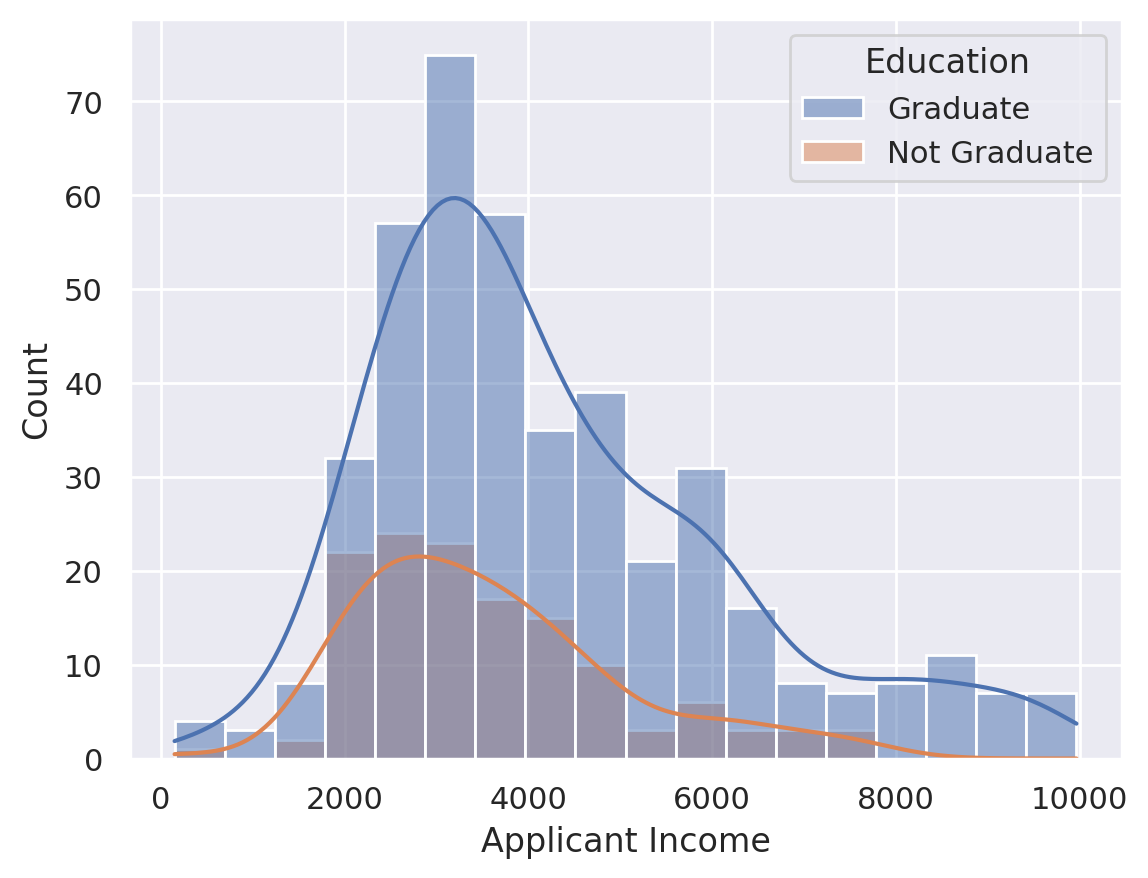

In [144]:
# Create the histogram for each category
sns.histplot(data=filtered_df, x='ApplicantIncome', hue='Education', kde=True)

# Set the axis label and show 
plt.xlabel('Applicant Income')
#plt.legend()
plt.show()

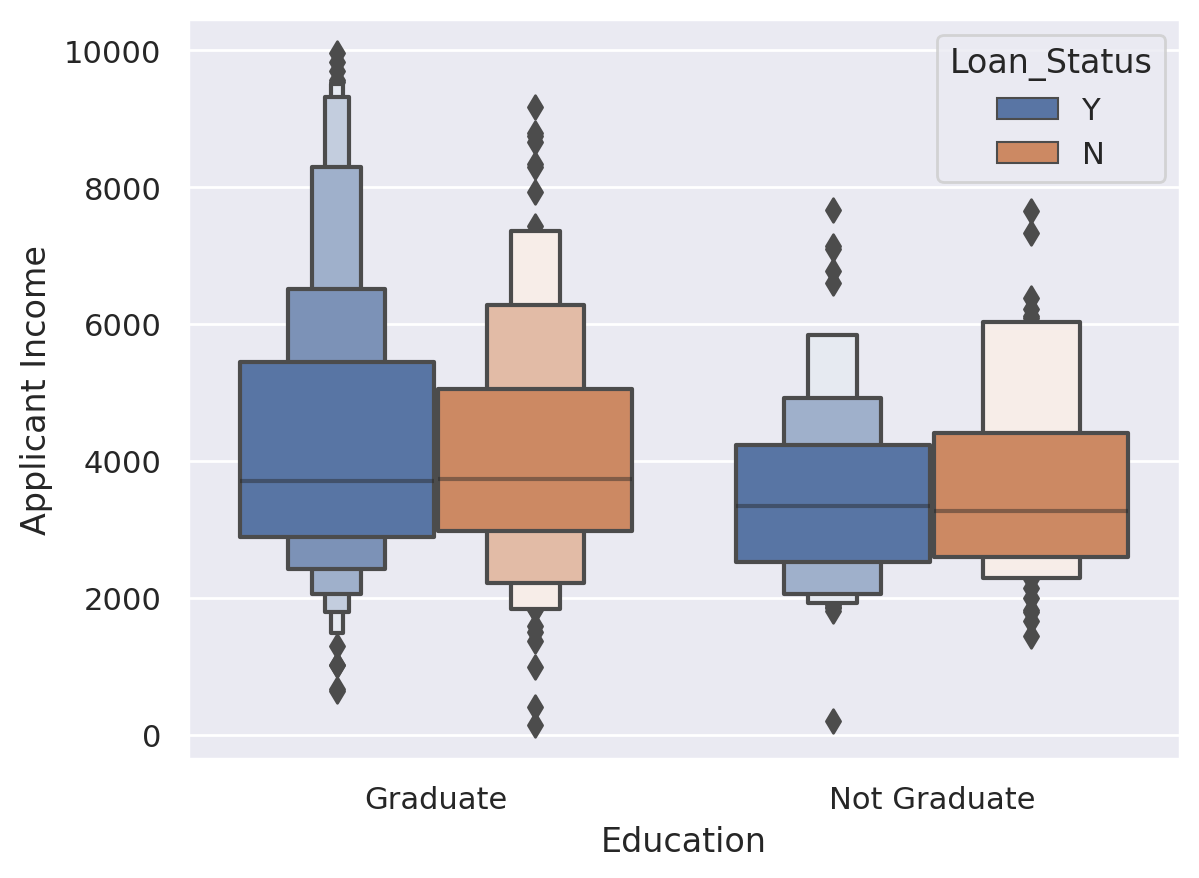

In [162]:
# We could also visualize that using a boxenplot 
sns.boxenplot(data=filtered_df, x='Education', y='ApplicantIncome', hue='Loan_Status')
plt.ylabel('Applicant Income')
plt.show()

Look at the histogram and boxplot of LoanAmount

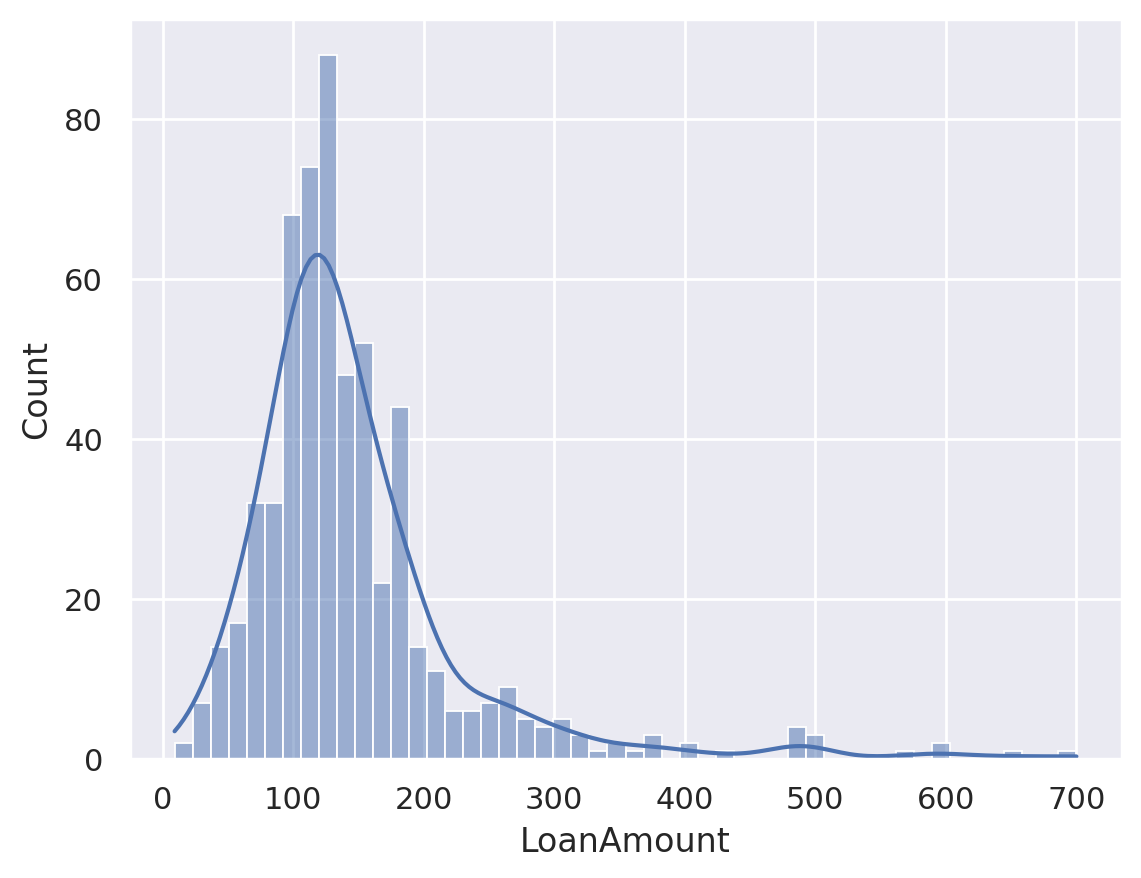

In [174]:
# Let's look at a distribution of LoanAmount
sns.histplot(data=df, x='LoanAmount', bins=50, kde=True)
plt.show()

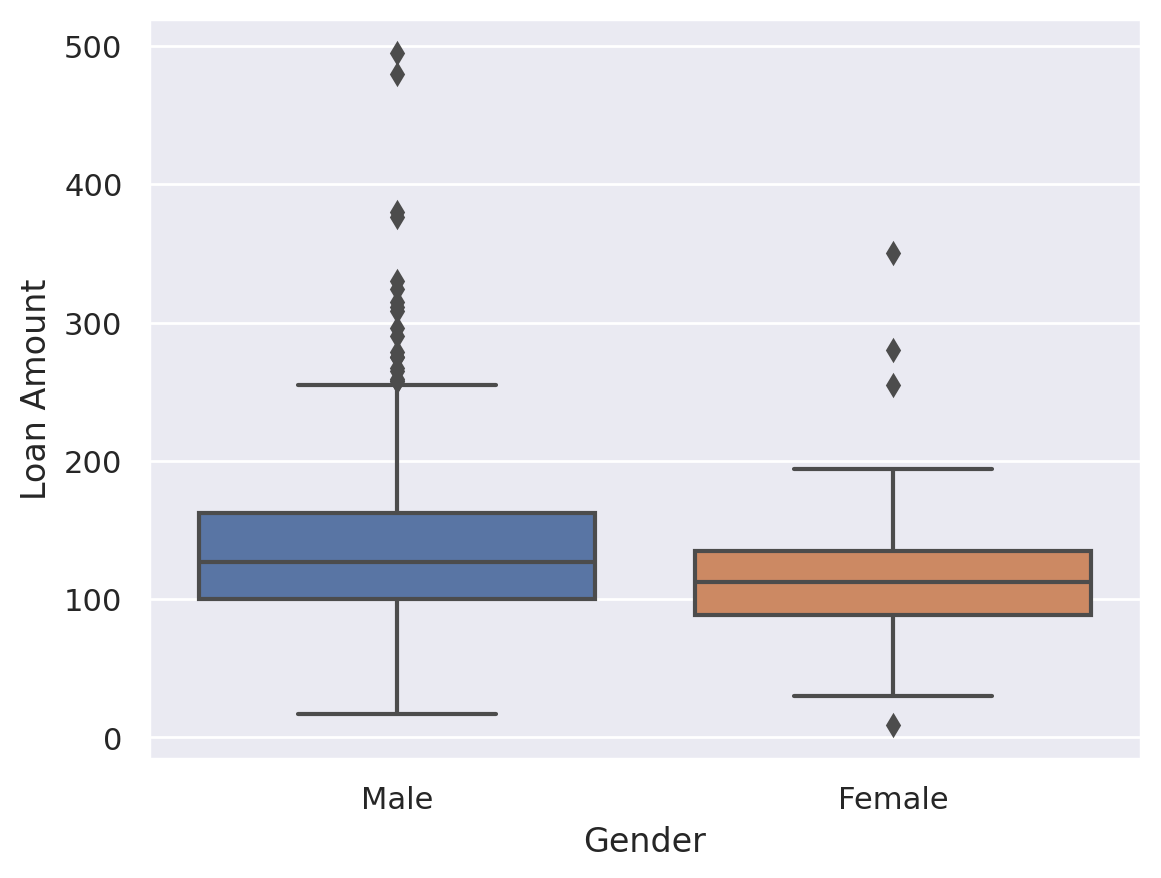

In [158]:
sns.boxplot(x='Gender', y='LoanAmount', data=filtered_df)
plt.ylabel('Loan Amount')
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [99]:
# Recall what categorical features are there
cat_feats

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [100]:
# Create a pivot table based on Gender 
gender_tab = pd.pivot_table(data=df, index='Gender')
gender_tab

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Gender,,,,,
Female,4643.473214,1108.008929,0.831683,126.697248,352.293578
Male,5446.460123,1742.932352,0.847007,149.265957,339.665272


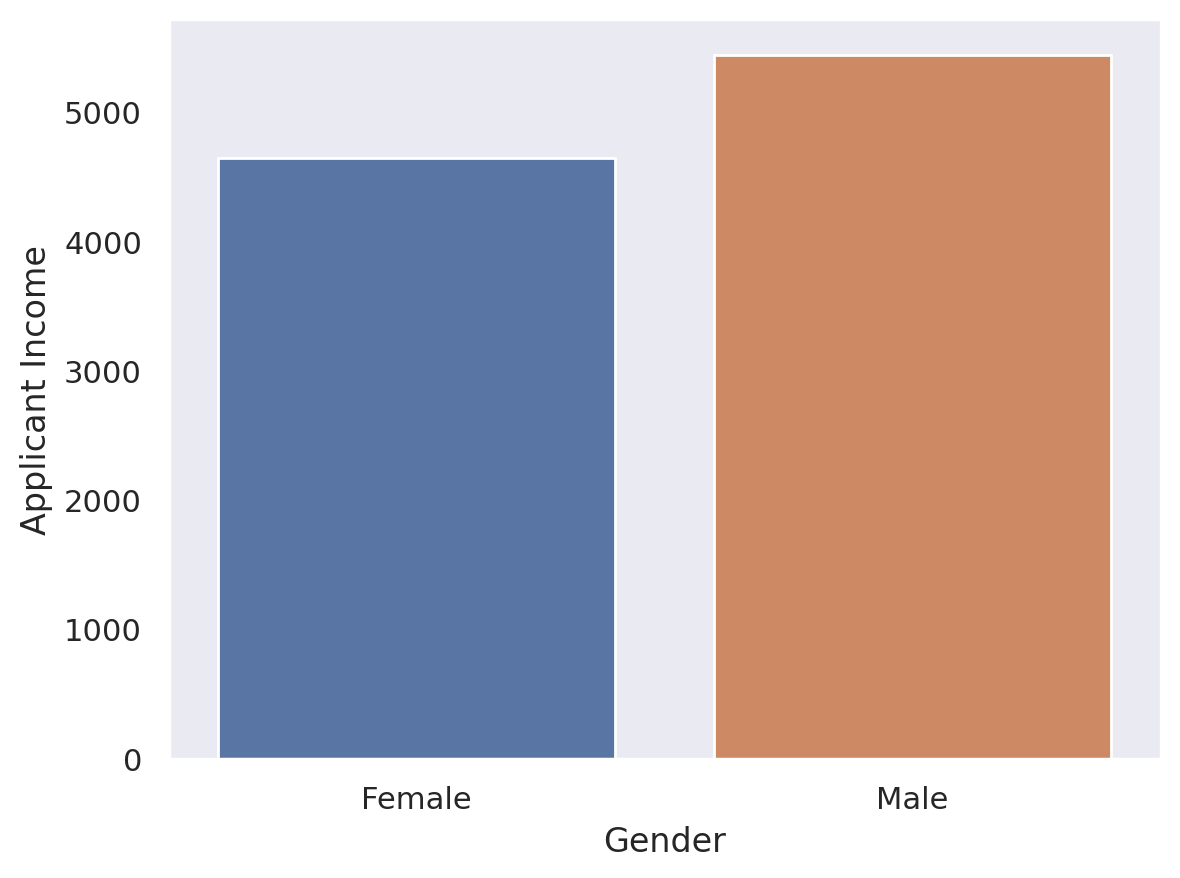

In [101]:
# Let's plot this in a bar chart
sns.barplot(data=gender_tab, x=gender_tab.index, y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.show()

In [102]:
# What about Property_Area
prop_table = pd.pivot_table(data=df, index=['Property_Area'])
prop_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Property_Area,,,,,
Rural,5554.083799,1645.536983,0.830303,152.260116,345.531429
Semiurban,5292.261803,1520.133047,0.861751,145.504386,347.113043
Urban,5398.247525,1716.350495,0.829670,142.198953,332.800000


In [103]:
# Look at the marital status
marit_table = pd.pivot_table(data=df, index=['Married'])
marit_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Married,,,,,
No,4970.384977,1316.558685,0.839196,128.883495,351.115385
Yes,5629.173367,1794.632965,0.842541,155.750000,336.987147


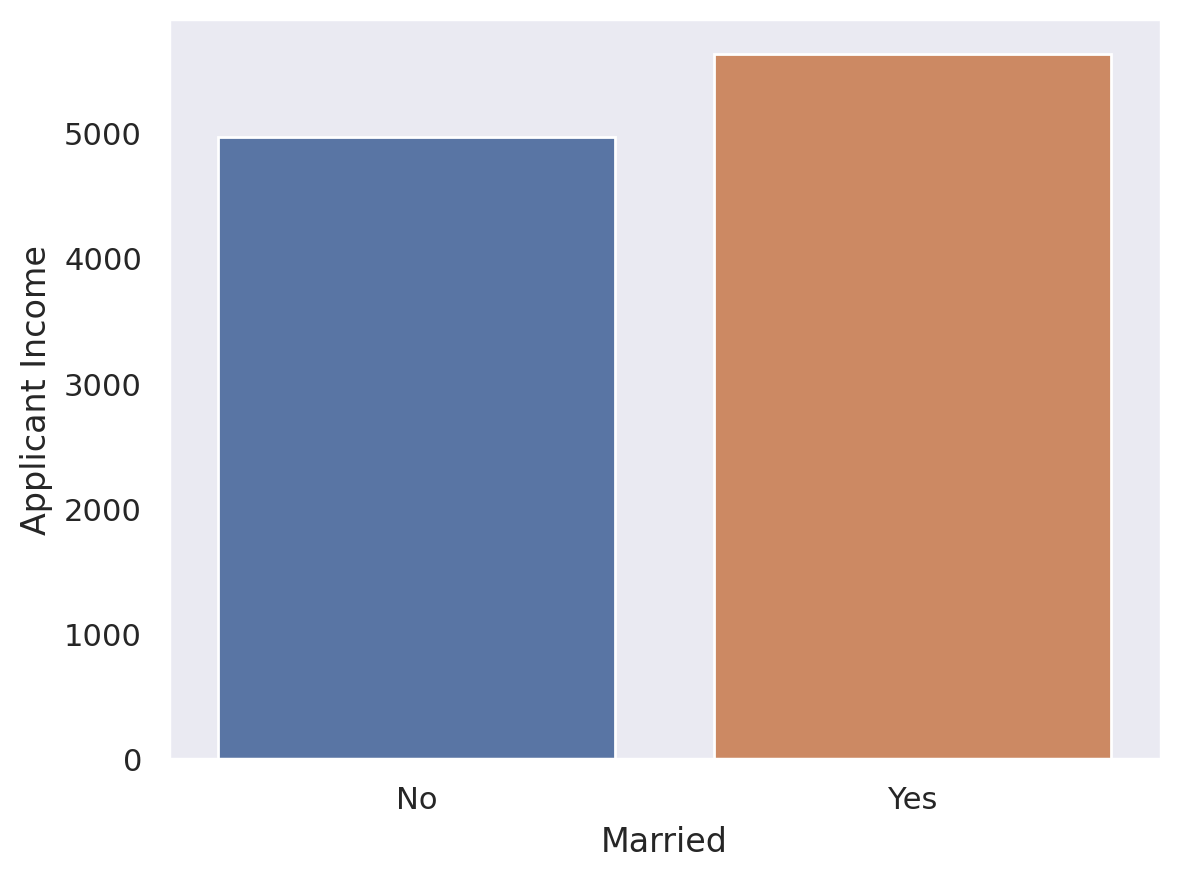

In [104]:
# Let's plot this in a bar chart
sns.barplot(data=marit_table, x=marit_table.index, y='ApplicantIncome')
plt.ylabel('Applicant Income')
plt.show()

In [105]:
# Look at employment
emp_table = pd.pivot_table(data=df, index=['Self_Employed'])
emp_table

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Self_Employed,,,,,
No,5049.748000,1580.989840,0.835853,141.748963,343.263804
Yes,7380.817073,1501.341463,0.840000,172.000000,336.300000


In [106]:
# Pivot table based on credit history
cred_table = pd.pivot_table(data=df, index=['Credit_History'])
cred_table

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
Credit_History,,,,
0.0,5679.438202,1542.179775,146.717647,341.927711
1.0,5426.526316,1528.250358,144.786026,342.192719


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [63]:
# Drop Loan_ID since we don't need it for the model
df.drop('Loan_ID', axis=1, inplace=True)

In [64]:
# Recall columns with missing values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
# Fill out LoanAmount with the mean for each gender 
df['LoanAmount'] = df.groupby('Gender')['LoanAmount'].transform(lambda x: x.fillna(x.mean()))

# Fill remaining NaN values with the mean
df['LoanAmount'].fillna((df['LoanAmount'].mean()), inplace=True)

In [66]:
# Fill loan_amount_term with the mean
df['Loan_Amount_Term'].fillna((df['Loan_Amount_Term'].mean()), inplace=True)

In [67]:
# Fill loan_amount_term with the mean
df['Credit_History'].fillna((df['Credit_History'].mean()), inplace=True)

In [68]:
# Convert gender to binary data
df_gender = pd.get_dummies(df['Gender'])

# Insert new dummy df and remove original Gender feat
new_df = pd.concat((df_gender, df), axis=1)
new_df = new_df.drop(['Gender'], axis=1)
new_df = new_df.drop(['Female'], axis=1)
new_df = new_df.rename(columns={'Male': 'Gender'})

In [69]:
# Convert Married to binary data
df_married = pd.get_dummies(df['Married'])

# Insert new dummy df and remove original Married feat
new_df = pd.concat((df_married, new_df), axis=1)
new_df = new_df.drop(['Married'], axis=1)
new_df = new_df.drop(['No'], axis=1)
new_df = new_df.rename(columns={'Yes': 'Married'})

In [70]:
# Convert Education to binary data
df_edu = pd.get_dummies(df['Education'])

# Insert new dummy df and remove original Education feat
new_df = pd.concat((df_edu, new_df), axis=1)
new_df = new_df.drop(['Education'], axis=1)
new_df = new_df.drop(['Not Graduate'], axis=1)
new_df = new_df.rename(columns={'Graduate': 'Education'})

In [71]:
# Convert Self Employed to binary data
df_emp = pd.get_dummies(df['Self_Employed'])

# Insert new dummy df and remove original Employment feat
new_df = pd.concat((df_emp, new_df), axis=1)
new_df = new_df.drop(['Self_Employed'], axis=1)
new_df = new_df.drop(['No'], axis=1)
new_df = new_df.rename(columns={'Yes': 'Self_Employed'})

In [72]:
# Convert the target to binary data
df_loan_status = pd.get_dummies(df['Loan_Status'])

# Insert new dummy df and remove original Employment feat
new_df = pd.concat((df_loan_status, new_df), axis=1)
new_df = new_df.drop(['Loan_Status'], axis=1)
new_df = new_df.drop(['N'], axis=1)
new_df = new_df.rename(columns={'Y': 'Loan_Status'})

In [73]:
# Convert remaining variables to dummy variables
new_df = pd.get_dummies(data=new_df, columns=['Dependents', 'Property_Area'])
new_df.head(3)

,Loan_Status,Self_Employed,Education,Married,Gender,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,1,0,1,5849,0.0,149.265957,360.0,1.0,1,0,0,0,0,0,1
1,0,0,1,1,1,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,1,0,0
2,1,1,1,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,0,1


In [152]:
# Check again for missing values 
new_df.isna().sum()

Loan_Status                0
Self_Employed              0
Education                  0
Married                    0
Gender                     0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [153]:
# We need the numpy library to calculate the log
import numpy as np

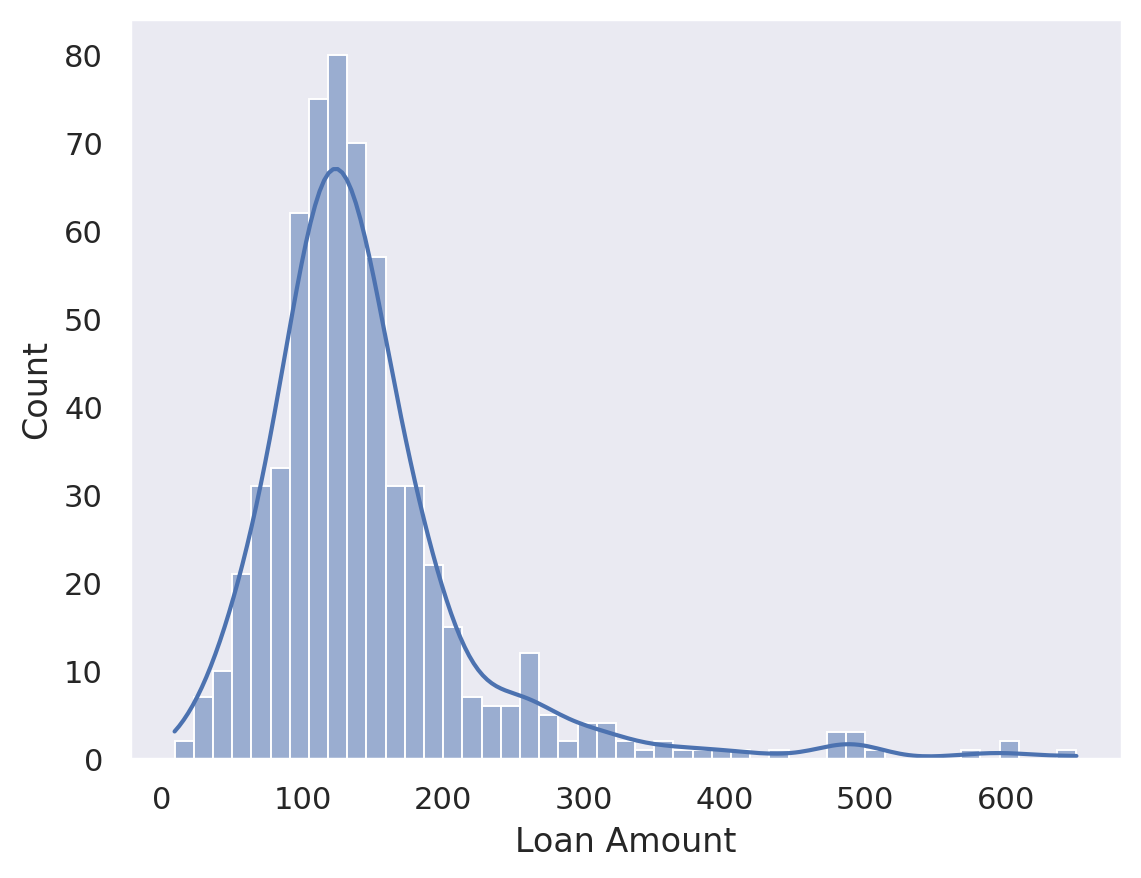

In [154]:
# Create the histogram using LoanAmount
sns.histplot(data=new_df, x='LoanAmount', kde=True)
plt.xlabel('Loan Amount')
plt.show()

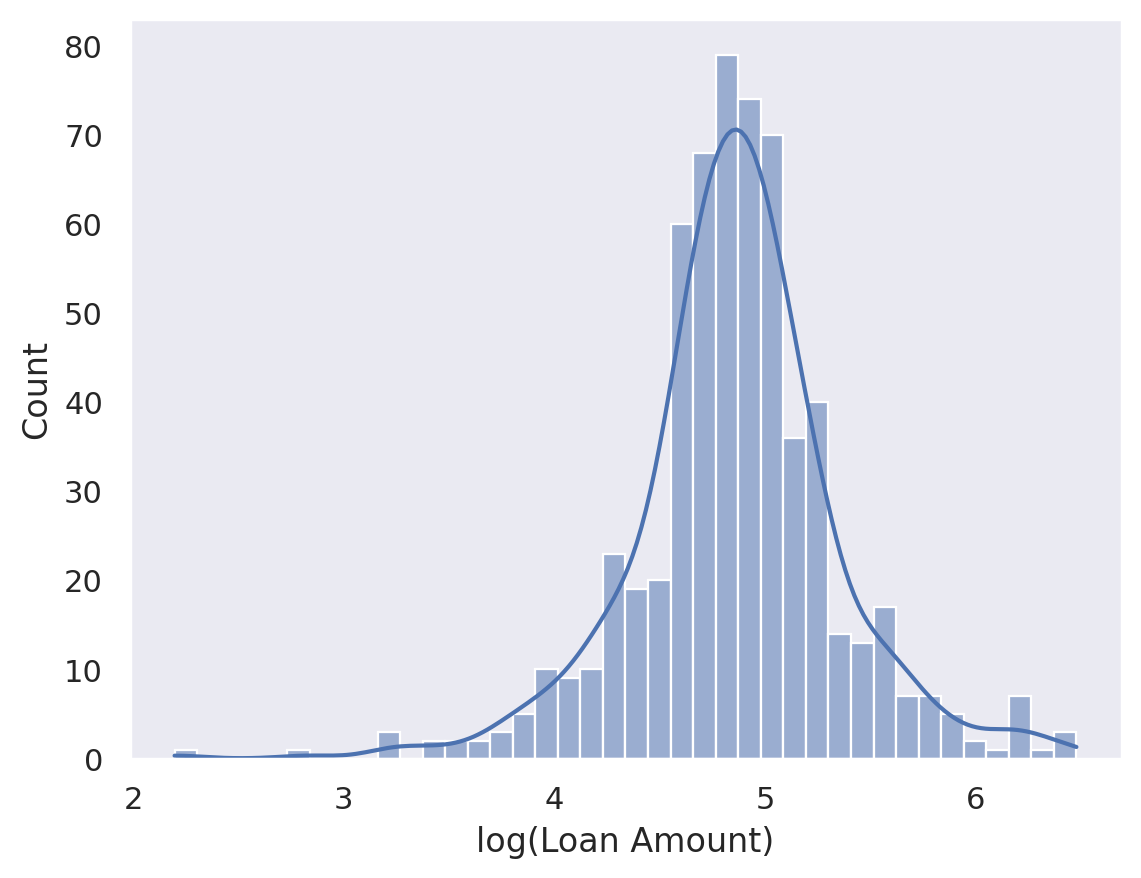

In [155]:
# using log of LoanAmount
sns.histplot(x=np.log(df['LoanAmount']), kde=True)
plt.xlabel('log(Loan Amount)')
plt.show()

In [156]:
# The distribution looks much closer to a normal distribution, 
# so we may opt to use loan amount instead

In [157]:
# Set a new dataframe which will have new features
new_df['log_LoanAmount'] = np.log(new_df['LoanAmount'])
new_df.drop('LoanAmount', axis=1, inplace=True)

Combine both incomes as total income and take a log transformation of the same.

In [75]:
# Get the total income
total_inc = new_df['ApplicantIncome'] + new_df['CoapplicantIncome'] 

In [76]:
total_inc

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Length: 614, dtype: float64

In [159]:
# Create new feature with log of total income
new_df['log_TotalInc'] = np.log(total_inc)
new_df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1, inplace=True)

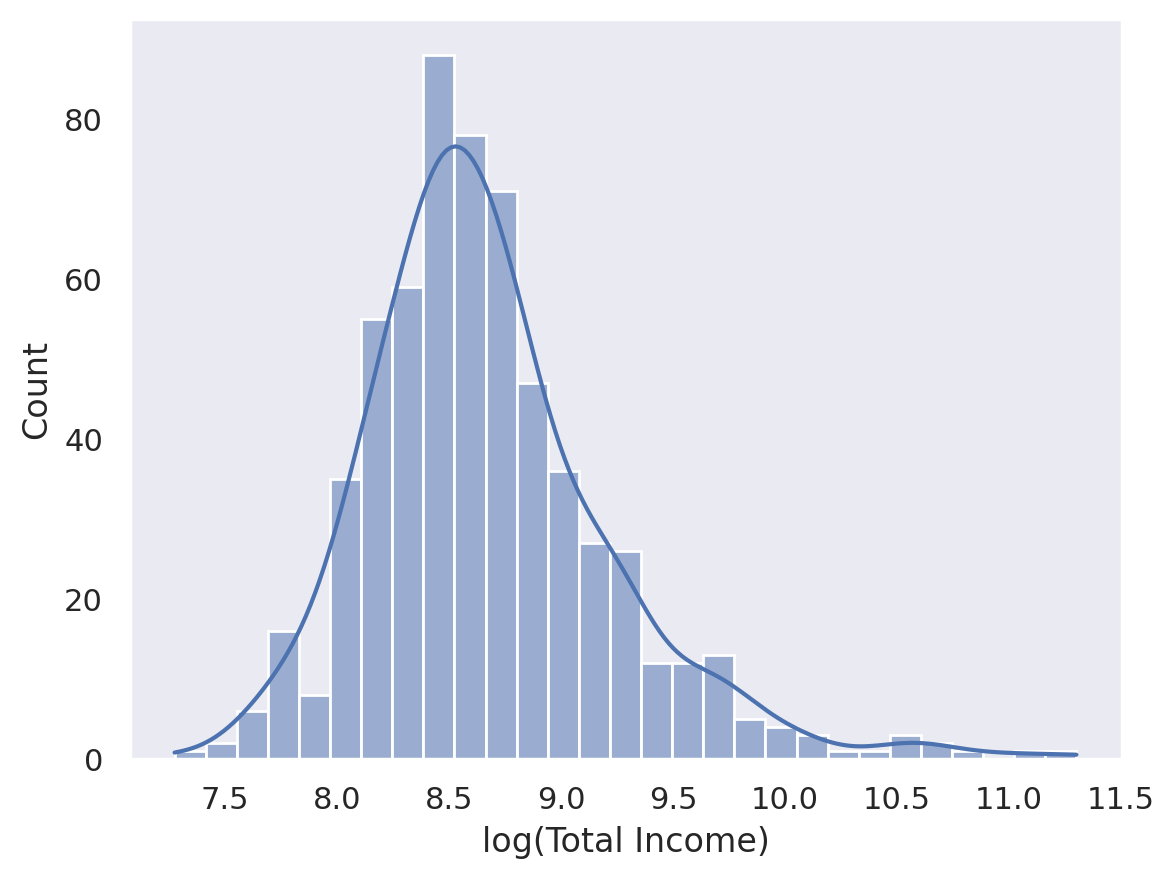

In [160]:
# Look at the distribution using log of TotalIncome
sns.histplot(x=new_df['log_TotalInc'], kde=True)
plt.xlabel('log(Total Income)')
plt.show()

In [161]:
new_df.head(3)

,Loan_Status,Self_Employed,Education,Married,Gender,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,log_LoanAmount,log_TotalInc
0,1,0,1,0,1,360.0,1.0,1,0,0,0,0,0,1,5.005730,8.674026
1,0,0,1,1,1,360.0,1.0,0,1,0,0,1,0,0,4.852030,8.714568
2,1,1,1,1,1,360.0,1.0,1,0,0,0,0,0,1,4.189655,8.006368


## 4. Building a Predictive Model

In [162]:
# Import libraries for model building
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [163]:
# Separate the target from the data
y = new_df['Loan_Status']
X = new_df.drop('Loan_Status', axis=1)

In [164]:
# Split data into train and test 
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

In [165]:
print(X_train.shape)
print(X_test.shape)

(429, 15)
(185, 15)


In [166]:
# Scale the data
scaler = MinMaxScaler()

# Fit the data in the scaler
scaled_data = scaler.fit_transform(X_train)

In [167]:
# Instantiate classifier
clf = RandomForestClassifier()

# Fit the data to the model
clf.fit(scaled_data, y_train)

RandomForestClassifier()

In [168]:
# Predict using our model 
y_pred = clf.predict(X_test)

/home/eduardo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [169]:
# Check the score
print('Test set score: ' + str(clf.score(X_test, y_test)))

Test set score: 0.5945945945945946


/home/eduardo/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [170]:
# run classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.75      0.57        65
           1       0.79      0.51      0.62       120

    accuracy                           0.59       185
   macro avg       0.62      0.63      0.59       185
weighted avg       0.67      0.59      0.60       185



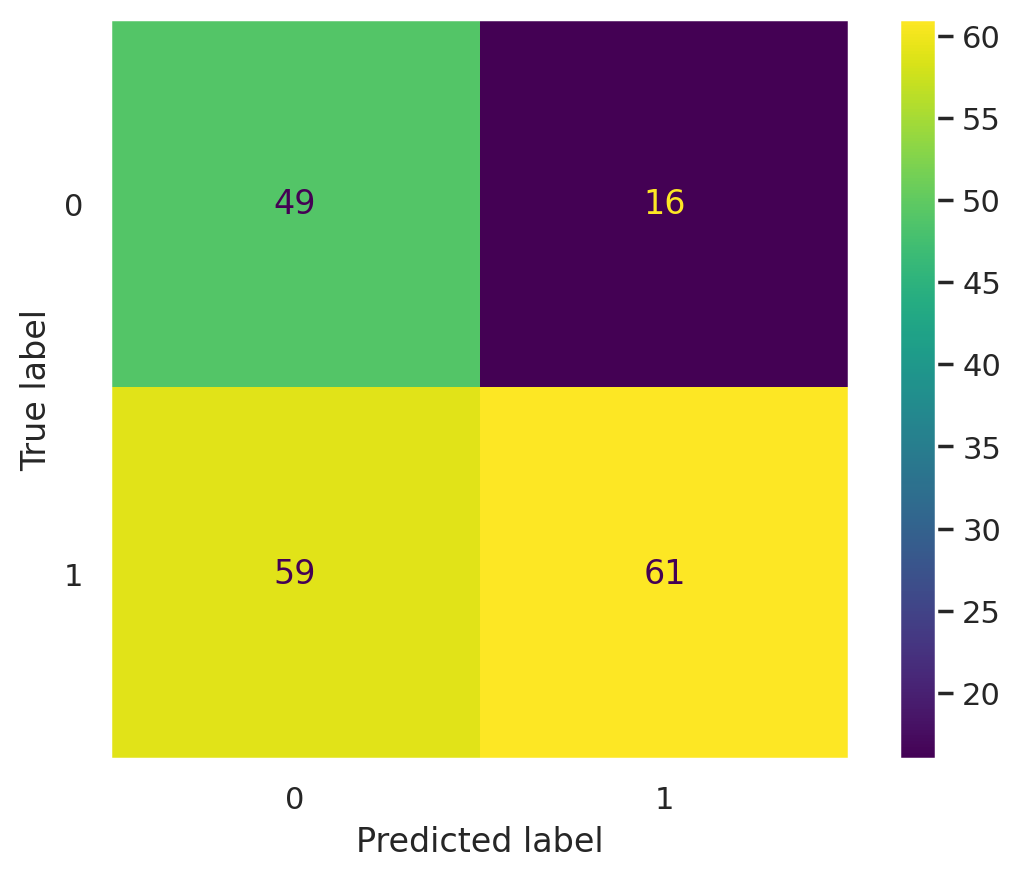

In [171]:
# create confusion matrix
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
sns.set(style='dark')
# plot the confusion matrix
cm.plot()

Try paramater grid search to improve the results

In [172]:
# Create a parameters dict
params = {
    'n_estimators': [90, 100, 115, 130],
    'min_samples_leaf': [3, 5, 7],
    'min_samples_split': [8, 10, 12],
    'max_depth': [80, 90, 100, 110],
} 

In [173]:
# Instantiate GridSearchModel 
grid_search = GridSearchCV(estimator = clf, param_grid = params, 
                          cv = 2, n_jobs = -1, verbose = 10)

In [174]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 144 candidates, totalling 288 fits
[CV 2/2; 3/144] START max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=115
[CV 2/2; 3/144] END max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=115;, score=0.804 total time=   0.1s
[CV 1/2; 9/144] START max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=90
[CV 1/2; 9/144] END max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=90;, score=0.842 total time=   0.1s
[CV 1/2; 13/144] START max_depth=80, min_samples_leaf=5, min_samples_split=8, n_estimators=90
[CV 1/2; 13/144] END max_depth=80, min_samples_leaf=5, min_samples_split=8, n_estimators=90;, score=0.814 total time=   0.1s
[CV 1/2; 18/144] START max_depth=80, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 1/2; 18/144] END max_depth=80, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.837 total time=   0.1s
[CV 2/2; 23/144] START max_depth=80, min_samples_leaf=5, 

[CV 2/2; 4/144] START max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=130
[CV 2/2; 4/144] END max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=130;, score=0.804 total time=   0.2s
[CV 1/2; 12/144] START max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=130
[CV 1/2; 12/144] END max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=130;, score=0.842 total time=   0.2s
[CV 1/2; 19/144] START max_depth=80, min_samples_leaf=5, min_samples_split=10, n_estimators=115
[CV 1/2; 19/144] END max_depth=80, min_samples_leaf=5, min_samples_split=10, n_estimators=115;, score=0.819 total time=   0.1s
[CV 1/2; 25/144] START max_depth=80, min_samples_leaf=7, min_samples_split=8, n_estimators=90
[CV 1/2; 25/144] END max_depth=80, min_samples_leaf=7, min_samples_split=8, n_estimators=90;, score=0.837 total time=   0.1s
[CV 1/2; 30/144] START max_depth=80, min_samples_leaf=7, min_samples_split=10, n_estimators=100
[CV 1/2; 30/144] END

[CV 1/2; 2/144] START max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 1/2; 2/144] END max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.828 total time=   0.1s
[CV 2/2; 8/144] START max_depth=80, min_samples_leaf=3, min_samples_split=10, n_estimators=130
[CV 2/2; 8/144] END max_depth=80, min_samples_leaf=3, min_samples_split=10, n_estimators=130;, score=0.804 total time=   0.2s
[CV 1/2; 14/144] START max_depth=80, min_samples_leaf=5, min_samples_split=8, n_estimators=100
[CV 1/2; 14/144] END max_depth=80, min_samples_leaf=5, min_samples_split=8, n_estimators=100;, score=0.842 total time=   0.1s
[CV 2/2; 19/144] START max_depth=80, min_samples_leaf=5, min_samples_split=10, n_estimators=115
[CV 2/2; 19/144] END max_depth=80, min_samples_leaf=5, min_samples_split=10, n_estimators=115;, score=0.804 total time=   0.1s
[CV 2/2; 25/144] START max_depth=80, min_samples_leaf=7, min_samples_split=8, n_estimators=90
[CV 2/2; 25/144] END m

[CV 2/2; 2/144] START max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100
[CV 2/2; 2/144] END max_depth=80, min_samples_leaf=3, min_samples_split=8, n_estimators=100;, score=0.804 total time=   0.1s
[CV 1/2; 10/144] START max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=100
[CV 1/2; 10/144] END max_depth=80, min_samples_leaf=3, min_samples_split=12, n_estimators=100;, score=0.842 total time=   0.1s
[CV 1/2; 16/144] START max_depth=80, min_samples_leaf=5, min_samples_split=8, n_estimators=130
[CV 1/2; 16/144] END max_depth=80, min_samples_leaf=5, min_samples_split=8, n_estimators=130;, score=0.814 total time=   0.2s
[CV 1/2; 23/144] START max_depth=80, min_samples_leaf=5, min_samples_split=12, n_estimators=115
[CV 1/2; 23/144] END max_depth=80, min_samples_leaf=5, min_samples_split=12, n_estimators=115;, score=0.837 total time=   0.1s
[CV 1/2; 29/144] START max_depth=80, min_samples_leaf=7, min_samples_split=10, n_estimators=90
[CV 1/2; 29/144] EN

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'min_samples_leaf': [3, 5, 7],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [90, 100, 115, 130]},
             verbose=10)

In [175]:
# Check score with optimized model
print('Test set score: ' + str(grid_search.score(X_test, y_test)))

Test set score: 0.7891891891891892


In [176]:
# Select the best estimator
best_grid = grid_search.best_estimator_

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        65
           1       0.76      0.98      0.86       120

    accuracy                           0.79       185
   macro avg       0.85      0.71      0.72       185
weighted avg       0.82      0.79      0.76       185



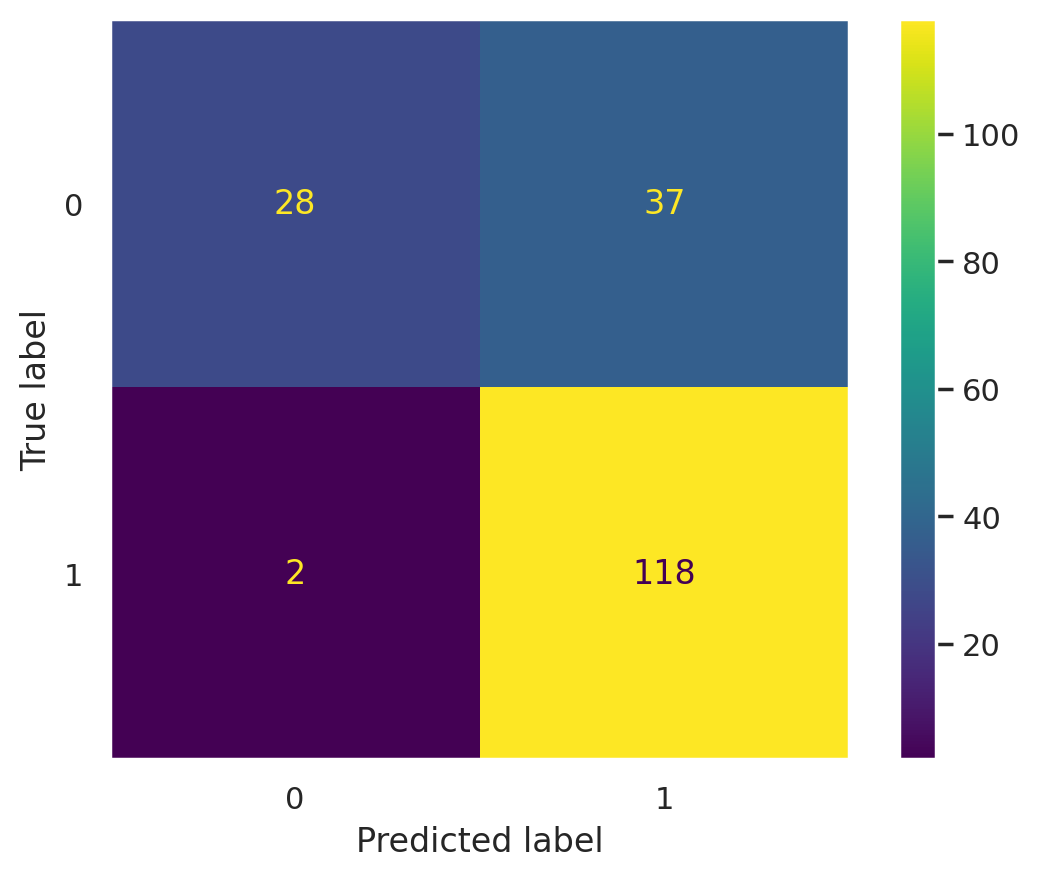

In [177]:
y_opt = best_grid.predict(X_test)

# run classification report
print(classification_report(y_test, y_opt))

# create confusion matrix
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_opt))
sns.set(style='dark')

# plot the confusion matrix
cm.plot()

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [24]:
# Import libraries
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, FunctionTransformer, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
# Load the original dataset
df = pd.read_csv('/home/eduardo/mini-project-IV/data/data.csv') 

# Separate target from the data
X = df.drop(['Loan_Status', 'Loan_ID'], axis = 1)
y = df['Loan_Status']

# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
# Create separate lists with categorical and numerical features
cat_feats = X_train.dtypes[X_train.dtypes == 'object'].index.tolist()
num_feats = X_train.dtypes[~X_train.dtypes.index.isin(cat_feats)].index.tolist()

In [79]:
def column_sum(column1, column2):
    df['sum_of_cols'] = df[column1] + df[column2]
    return df['sum_of_cols']

In [81]:
column_sum('ApplicantIncome', 'CoapplicantIncome')

0      5849.0
1      6091.0
2      3000.0
3      4941.0
4      6000.0
        ...  
609    2900.0
610    4106.0
611    8312.0
612    7583.0
613    4583.0
Name: sum_of_cols, Length: 614, dtype: float64

In [82]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,sum_of_cols
0,Male,No,0,Graduate,No,5849,0.0,149.265957,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


In [17]:
# Now, define functions that return numerical and categorical dfs
def numFeat(data):
    return data[num_feats]

def catFeat(data):
    return data[cat_feats]

In [ ]:
# Pipeline for 

In [18]:
# Pipeline for processing num and cat dfs 
num_transform = Pipeline([
    ('FunctionTransformer', FunctionTransformer()), 
    ('impute_mean', SimpleImputer(strategy='mean')),                               
    ('scaler', StandardScaler())
])

cat_transform = Pipeline([
    ('FunctionTransformer',FunctionTransformer()),
    ('impute_mode', SimpleImputer(strategy='most_frequent')), 
    ('one-hot-encode', OneHotEncoder(sparse=False)),
])

In [19]:
# Apply num_transform to num_feats, cat_transform to cat_feats
ct = ColumnTransformer([
    ('numeric', num_transform, num_feats), 
    ('categorical', cat_transform, cat_feats)
])

In [20]:
# Create a pipeline with the classifier (clf)
pipeline = Pipeline([
    ('preprocess', ct),
    ('model', RandomForestClassifier())
])

# Train the model 
pipeline.fit(X_train, y_train)

# Check score with optimized model
pipeline.score(X_test, y_test)

0.7567567567567568

In [21]:
# Now, let's optimize the model using GridSearchCV and Pipeline

In [22]:
# Set a dict of parameters 
parameters = {
    'preprocess__numeric__scaler': [StandardScaler(), MinMaxScaler()],
    'model__n_estimators': [90, 100, 115, 130],
    'model__min_samples_split': [8, 10, 12],
    'model__max_depth': [80, 90, 100, 110],
    'model__min_samples_leaf': [3, 5, 7]
}

In [25]:
# Perform gridsearch on the pipe with the above dict of parameters
grid = GridSearchCV(pipeline, parameters, cv=2).fit(X_train, y_train)

In [26]:
# Print out best parameters
# Check best combination of parameters
print(grid.best_params_)

{'model__max_depth': 110, 'model__min_samples_leaf': 3, 'model__min_samples_split': 10, 'model__n_estimators': 115, 'preprocess__numeric__scaler': MinMaxScaler()}


In [52]:
grid.best_score_

0.8274505542273418

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185



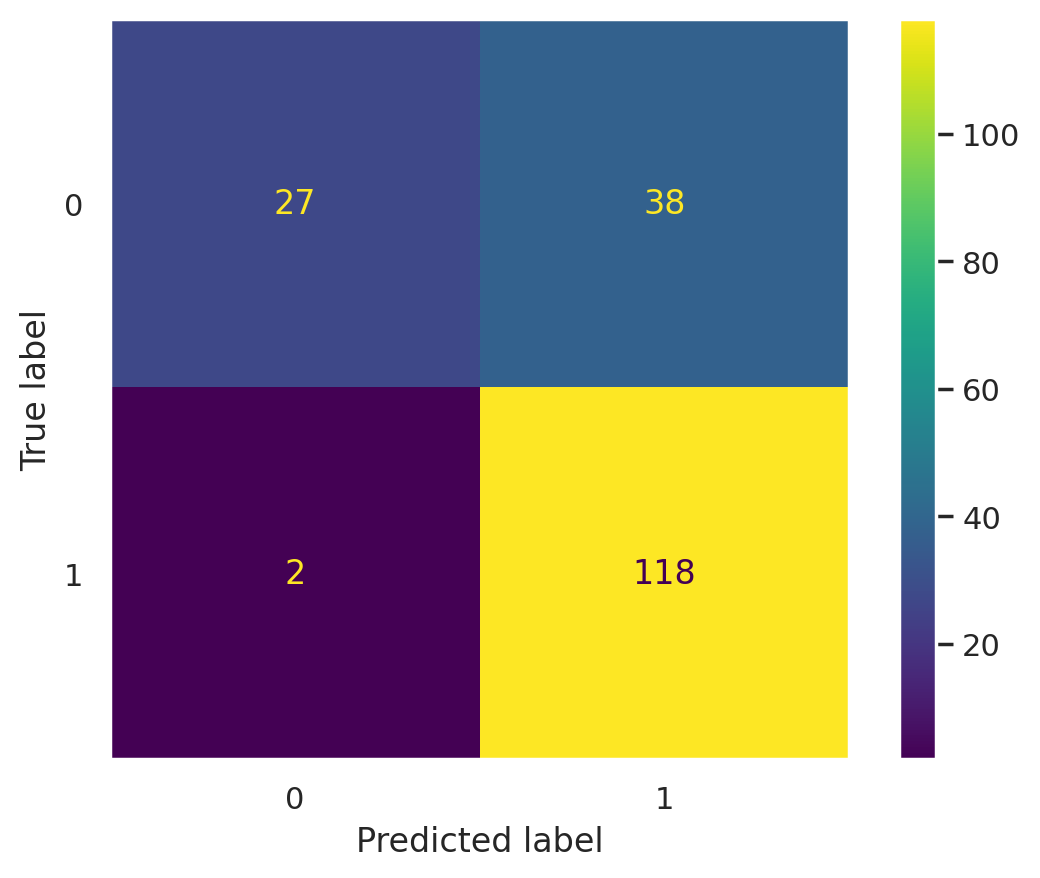

In [56]:
y_opt = grid.best_estimator_.predict(X_test)

# run classification report
print(classification_report(y_test, y_opt))

# create confusion matrix
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, y_opt))
sns.set(style='dark')

# plot the confusion matrix
cm.plot()

In [28]:
# Now we can use pickle to store our model
import pickle
pickle.dump(grid, open('miniproject-model.p', 'wb'))

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
# The application is running in the AWS terminal 

In [46]:
X_test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,Male,Yes,0,Graduate,No,9083,0.0,228.0,360.0,1.0,Semiurban
377,Male,Yes,0,Graduate,No,4310,0.0,130.0,360.0,NaN,Semiurban
163,Male,Yes,2,Graduate,No,4167,1447.0,158.0,360.0,1.0,Rural


In [47]:
# Select data to send to AWS server
json_data = {'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '2',
 'Education': 'Graduate',
 'Self_Employed': 'No',
 'ApplicantIncome': 4167,
 'CoapplicantIncome': 1447.0,
 'LoanAmount': 158.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0,
 'Property_Area': 'Rural'}

In [48]:
# Send our POST request
import requests
URL = "http://ec2-44-202-249-124.compute-1.amazonaws.com:5000/scoring" # Actual address depends on api

# sending get request and saving the response as response object
r = requests.post(url = URL, json = json_data)# Send our POST request

In [49]:
r.status_code

200

In [50]:
print(r.json())

[[0.25581277647952955, 0.7441872235204702]]


In [51]:
y_test.head(3)

350    Y
377    Y
163    Y
Name: Loan_Status, dtype: object